# Logit model external test

we will test the logit model using the most traveled to OD pairs.

TO DO:
- download trips logit CS10
- make a small path with cost and demand to assign the demand to path using the function that is in the pipeline
- compare that to the original data


In [1]:
import pandas as pd
import os
print(os.getcwd())
os.chdir(r"C:\Users\LMENENDEZ\GitHub\MultiModX")
print(os.getcwd())
pd.set_option('display.max_columns', None)
pd.set_option('display.max_columns', None)

c:\Users\LMENENDEZ\GitHub\MultiModX\notebooks
C:\Users\LMENENDEZ\GitHub\MultiModX


In [2]:
from script.trips_format import *

In [3]:
trips_logit=pd.read_csv(r"C:\Users\LMENENDEZ\GitHub\MultiModX\trips_logit_CS10_2_conn.csv")

In [4]:
trips_logit=trips_logit_format(trips_logit, drop_single_paths=True,max_num_options=15)

In [5]:
selected_od_pairs=pd.DataFrame({"origin":["ES300","ES511","ES300","ES617","ES709","ES111","ES511","ES431","ES532","ES300","ES523","ES300","ES523","ES423","ES521","ES709","ES511","ES613","ES705","ES707"],
              "destination":["ES511","ES300","ES617","ES300","ES111","ES709","ES431","ES511","ES300","ES532","ES300","ES523","ES423","ES523","ES709","ES521","ES613","ES511","ES707","ES705"]})

In [6]:
selected_od_pairs

,origin,destination
0,ES300,ES511
1,ES511,ES300
2,ES300,ES617
3,ES617,ES300
4,ES709,ES111
5,ES111,ES709
6,ES511,ES431
7,ES431,ES511
8,ES532,ES300
9,ES300,ES532


In [7]:
trips_selected=pd.merge(selected_od_pairs,trips_logit,on=["origin","destination"],how="left")

In [8]:
trips_selected

,origin,destination,path,trips,archetype_0,archetype_1,archetype_2,archetype_3,archetype_4,archetype_5,nmodes,access_time,egress_time,travel_time_0,cost_0,emissions_0,mct_time_0_1,travel_time_1,cost_1,emissions_1,mct_time_1_2,travel_time_2,cost_2,emissions_2,total_travel_time,total_cost,total_emissions,noption,trips_per_od_pair,trips_per_od_pair_arch_0,prob_per_od_pair_arch_0,trips_per_od_pair_arch_1,prob_per_od_pair_arch_1,trips_per_od_pair_arch_2,prob_per_od_pair_arch_2,trips_per_od_pair_arch_3,prob_per_od_pair_arch_3,trips_per_od_pair_arch_4,prob_per_od_pair_arch_4,trips_per_od_pair_arch_5,prob_per_od_pair_arch_5
0,ES300,ES511,"['007160000', '007171801']",6361.680,4325.017695,280.996369,409.739139,410.587811,420.376248,499.745738,1.0,23.0,36.0,165.172414,52.96,14.560000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,224.172414,52.96,14.560000,1,8274.186,5624.733967,0.768928,362.881315,0.774348,529.131436,0.774362,535.946399,0.766099,547.768131,0.767435,651.864752,0.766640
1,ES300,ES511,"['LEMD', 'LEBL']",1586.100,1074.899004,68.168852,99.262846,105.183455,106.875102,128.666741,1.0,123.0,63.0,77.619048,136.23,43.547619,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,263.619048,136.23,43.547619,2,8274.186,5624.733967,0.191102,362.881315,0.187854,529.131436,0.187596,535.946399,0.196257,547.768131,0.195110,651.864752,0.197383
2,ES300,ES511,"['007160000', '007104040', '007171801']",309.198,212.926065,12.886202,18.909747,19.295129,19.552718,22.029139,1.0,23.0,36.0,81.666667,25.15,7.880000,15.0,109.333333,23.71,7.430000,NaN,NaN,NaN,NaN,265.000000,48.86,15.310000,3,8274.186,5624.733967,0.037855,362.881315,0.035511,529.131436,0.035737,535.946399,0.036002,547.768131,0.035695,651.864752,0.033794
3,ES300,ES511,"['007117000', '007171801']",17.208,11.891204,0.829892,1.219704,0.880004,0.964062,1.423134,1.0,32.0,36.0,562.000000,52.71,14.490000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,630.000000,52.71,14.490000,4,8274.186,5624.733967,0.002114,362.881315,0.002287,529.131436,0.002305,535.946399,0.001642,547.768131,0.001760,651.864752,0.002183
4,ES511,ES300,"['007171801', '007160000']",7098.778,4815.351893,318.515538,453.898785,493.409581,415.609147,582.541057,1.0,41.0,18.0,163.464286,52.96,14.560000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,222.464286,52.96,14.560000,1,9066.654,6160.964201,0.781591,404.917038,0.786619,572.072183,0.793429,629.936123,0.783269,529.978837,0.784200,746.494618,0.780369
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,ES613,ES511,"['LEZL', 'LEBL']",3.758,1.436882,0.000000,0.000000,0.884235,1.215824,0.221059,1.0,209.0,63.0,99.375000,163.13,58.072500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,371.375000,163.13,58.072500,4,138.302,62.058742,0.023154,2.689355,0.000000,3.576155,0.000000,24.098283,0.036693,38.261863,0.031776,7.617601,0.029019
63,ES705,ES707,"['GCLP', 'GCLA']",329.022,182.656490,17.421935,10.011992,66.083736,25.002165,27.845683,1.0,115.0,60.0,50.000000,107.35,49.030000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,225.000000,107.35,49.030000,1,337.527,188.195543,0.970568,17.755849,0.981194,10.129844,0.988366,67.439036,0.979903,25.414648,0.983770,28.592080,0.973895
64,ES705,ES707,"['GCLP', 'GCXO', 'GCLA']",8.505,5.539053,0.333915,0.117852,1.355300,0.412483,0.746397,1.0,115.0,60.0,30.000000,81.66,43.247561,25.0,29.878049,88.11,44.370000,NaN,NaN,NaN,NaN,259.878049,169.77,87.617561,2,337.527,188.195543,0.029432,17.755849,0.018806,10.129844,0.011634,67.439036,0.020097,25.414648,0.016230,28.592080,0.026105
65,ES707,ES705,"['GCLA', 'GCLP']",347.478,203.178529,12.571254,7.886030,71.248003,24.420587,28.173597,1.0,116.0,57.0,50.000000,107.35,46.315000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,223.000000,107.35,46.315000,1,354.914,207.893663,0.977319,12.867527,0.976975,8.028720,0.982228,72.479490,0.983009,24.871684,0.981863,28.772916,0.979171


In [9]:
paths_w_costs=generate_paths_w_costs(trips_selected,max_num_option=15)

In [10]:
paths_w_costs

,origin,destination,travel_time_1,cost_1,emissions_1,train_1,plane_1,multimodal_1,av_1,travel_time_2,cost_2,emissions_2,train_2,plane_2,multimodal_2,av_2,travel_time_3,cost_3,emissions_3,train_3,plane_3,multimodal_3,av_3,travel_time_4,cost_4,emissions_4,train_4,plane_4,multimodal_4,av_4,travel_time_5,cost_5,emissions_5,train_5,plane_5,multimodal_5,av_5,travel_time_6,cost_6,emissions_6,train_6,plane_6,multimodal_6,av_6,travel_time_7,cost_7,emissions_7,train_7,plane_7,multimodal_7,av_7,travel_time_8,cost_8,emissions_8,train_8,plane_8,multimodal_8,av_8,travel_time_9,cost_9,emissions_9,train_9,plane_9,multimodal_9,av_9,travel_time_10,cost_10,emissions_10,train_10,plane_10,multimodal_10,av_10,travel_time_11,cost_11,emissions_11,train_11,plane_11,multimodal_11,av_11,travel_time_12,cost_12,emissions_12,train_12,plane_12,multimodal_12,av_12,travel_time_13,cost_13,emissions_13,train_13,plane_13,multimodal_13,av_13,travel_time_14,cost_14,emissions_14,train_14,plane_14,multimodal_14,av_14,travel_time_15,cost_15,emissions_15,train_15,plane_15,multimodal_15,av_15
0,ES300,ES511,224.172414,52.96,14.560000,1,0,0,1,263.619048,136.23,43.547619,0,1,0,1,265.000000,48.86,15.310000,1,0,0,1,630.000000,52.71,14.490000,1,0,0,1,-1.0,-1.00,-1.0,0,0,0,0,-1.0,-1.0,-1.00,0,0,0,0,-1.0,-1.0,-1.0,0,0,0,0,-1.0,-1.0,-1.0,0,0,0,0,-1.0,-1.0,-1.0,0,0,0,0,-1.0,-1.0,-1.0,0,0,0,0,-1.0,-1.0,-1.0,0,0,0,0,-1.0,-1.0,-1.0,0,0,0,0,-1.0,-1.0,-1.0,0,0,0,0,-1.0,-1.0,-1.0,0,0,0,0,-1.0,-1.0,-1.0,0,0,0,0
4,ES511,ES300,222.464286,52.96,14.560000,1,0,0,1,271.625000,136.23,43.553750,0,1,0,1,615.000000,52.71,14.490000,1,0,0,1,-1.000000,-1.00,-1.000000,0,0,0,0,-1.0,-1.00,-1.0,0,0,0,0,-1.0,-1.0,-1.00,0,0,0,0,-1.0,-1.0,-1.0,0,0,0,0,-1.0,-1.0,-1.0,0,0,0,0,-1.0,-1.0,-1.0,0,0,0,0,-1.0,-1.0,-1.0,0,0,0,0,-1.0,-1.0,-1.0,0,0,0,0,-1.0,-1.0,-1.0,0,0,0,0,-1.0,-1.0,-1.0,0,0,0,0,-1.0,-1.0,-1.0,0,0,0,0,-1.0,-1.0,-1.0,0,0,0,0
7,ES300,ES617,240.083333,43.88,12.060000,1,0,0,1,249.666667,131.11,60.033333,0,1,0,1,253.384615,40.27,11.070000,1,0,0,1,-1.000000,-1.00,-1.000000,0,0,0,0,-1.0,-1.00,-1.0,0,0,0,0,-1.0,-1.0,-1.00,0,0,0,0,-1.0,-1.0,-1.0,0,0,0,0,-1.0,-1.0,-1.0,0,0,0,0,-1.0,-1.0,-1.0,0,0,0,0,-1.0,-1.0,-1.0,0,0,0,0,-1.0,-1.0,-1.0,0,0,0,0,-1.0,-1.0,-1.0,0,0,0,0,-1.0,-1.0,-1.0,0,0,0,0,-1.0,-1.0,-1.0,0,0,0,0,-1.0,-1.0,-1.0,0,0,0,0
10,ES617,ES300,241.000000,43.88,12.060000,1,0,0,1,255.500000,131.11,60.033333,0,1,0,1,263.090909,40.27,11.070000,1,0,0,1,400.000000,45.00,12.370000,1,0,0,1,-1.0,-1.00,-1.0,0,0,0,0,-1.0,-1.0,-1.00,0,0,0,0,-1.0,-1.0,-1.0,0,0,0,0,-1.0,-1.0,-1.0,0,0,0,0,-1.0,-1.0,-1.0,0,0,0,0,-1.0,-1.0,-1.0,0,0,0,0,-1.0,-1.0,-1.0,0,0,0,0,-1.0,-1.0,-1.0,0,0,0,0,-1.0,-1.0,-1.0,0,0,0,0,-1.0,-1.0,-1.0,0,0,0,0,-1.0,-1.0,-1.0,0,0,0,0
14,ES709,ES111,404.000000,216.18,106.970000,0,1,0,1,558.000000,353.12,156.240000,0,1,0,1,-1.000000,-1.00,-1.000000,0,0,0,0,-1.000000,-1.00,-1.000000,0,0,0,0,-1.0,-1.00,-1.0,0,0,0,0,-1.0,-1.0,-1.00,0,0,0,0,-1.0,-1.0,-1.0,0,0,0,0,-1.0,-1.0,-1.0,0,0,0,0,-1.0,-1.0,-1.0,0,0,0,0,-1.0,-1.0,-1.0,0,0,0,0,-1.0,-1.0,-1.0,0,0,0,0,-1.0,-1.0,-1.0,0,0,0,0,-1.0,-1.0,-1.0,0,0,0,0,-1.0,-1.0,-1.0,0,0,0,0,-1.0,-1.0,-1.0,0,0,0,0
16,ES111,ES709,417.000000,216.18,106.970000,0,1,0,1,558.000000,355.46,166.935000,0,1,0,1,-1.000000,-1.00,-1.000000,0,0,0,0,-1.000000,-1.00,-1.000000,0,0,0,0,-1.0,-1.00,-1.0,0,0,0,0,-1.0,-1.0,-1.00,0,0,0,0,-1.0,-1.0,-1.0,0,0,0,0,-1.0,-1.0,-1.0,0,0,0,0,-1.0,-1.0,-1.0,0,0,0,0,-1.0,-1.0,-1.0,0,0,0,0,-1.0,-1.0,-1.0,0,0,0,0,-1.0,-1.0,-1.0,0,0,0,0,-1.0,-1.0,-1.0,0,0,0,0,-1.0,-1.0,-1.0,0,0,0,0,-1.0,-1.0,-1.0,0,0,0,0
18,ES511,ES431,323.000000,162.70,94.520000,0,1,0,1,401.125000,163.13,58.072500,0,1,0,1,523.625000,136.23,43.553750,0,1,0,1,-1.000000,-1.00,-1.000000,0,0,0,0,-1.0,-1.00,-1.0,0,0,0,0,-1.0,-1.0,-1.00,0,0,0,0,-1.0,-1.0,-1.0,0,0,0,0,-1.0,-1.0,-1.0,0,0,0,0,-1.0,-1.0,-1.0,0,0,0,0,-1.0,-1.0,-1.0,0,0,0,0,-1.0,-1.0,-1.0,0,0,0,0,-1.0,-1.0,-1.0,0,0,0,0,-1.0,-1.0,-1.0,0,0,0,0,-1.0,-1.0,-1.0,0,0,0,0,-1.0,-1.0,-1.0,0,0,0,0
21,ES431,ES511,318.000000,162.70,94.520000,0,1,0,1,401.375

In [13]:
from strategic_evaluator.logit_model import *

In [14]:
n_alternatives=15
n_archetypes=6
sensitivities={"sensitivities": os.getcwd()} 
paths_prob=predict_main(paths_w_costs,n_archetypes,n_alternatives,sensitivities)

The chosen alternative [`3.0`] is not available for the following observations (rownumber[choice]): 4[3.0]-5[3.0]-8[3.0]-9[3.0]-18[3.0]-19[3.0]
The chosen alternative [`4.0`] is not available for the following observations (rownumber[choice]): 1[4.0]-2[4.0]-4[4.0]-5[4.0]-6[4.0]-8[4.0]-9[4.0]-14[4.0]-18[4.0]-19[4.0]
The chosen alternative [`5.0`] is not available for the following observations (rownumber[choice]): 0[5.0]-1[5.0]-2[5.0]-3[5.0]-4[5.0]-5[5.0]-6[5.0]-7[5.0]-8[5.0]-9[5.0]-12[5.0]-13[5.0]-14[5.0]-15[5.0...
The chosen alternative [`6.0`] is not available for the following observations (rownumber[choice]): 0[6.0]-1[6.0]-2[6.0]-3[6.0]-4[6.0]-5[6.0]-6[6.0]-7[6.0]-8[6.0]-9[6.0]-11[6.0]-12[6.0]-13[6.0]-14[6.0...
The chosen alternative [`7.0`] is not available for the following observations (rownumber[choice]): 0[7.0]-1[7.0]-2[7.0]-3[7.0]-4[7.0]-5[7.0]-6[7.0]-7[7.0]-8[7.0]-9[7.0]-10[7.0]-11[7.0]-12[7.0]-13[7.0...
The chosen alternative [`8.0`] is not available for the following obser

In [15]:
paths_prob

,origin,destination,archetype_0_prob_1,archetype_0_prob_2,archetype_0_prob_3,archetype_0_prob_4,archetype_0_prob_5,archetype_0_prob_6,archetype_0_prob_7,archetype_0_prob_8,archetype_0_prob_9,archetype_0_prob_10,archetype_0_prob_11,archetype_0_prob_12,archetype_0_prob_13,archetype_0_prob_14,archetype_0_prob_15,archetype_1_prob_1,archetype_1_prob_2,archetype_1_prob_3,archetype_1_prob_4,archetype_1_prob_5,archetype_1_prob_6,archetype_1_prob_7,archetype_1_prob_8,archetype_1_prob_9,archetype_1_prob_10,archetype_1_prob_11,archetype_1_prob_12,archetype_1_prob_13,archetype_1_prob_14,archetype_1_prob_15,archetype_2_prob_1,archetype_2_prob_2,archetype_2_prob_3,archetype_2_prob_4,archetype_2_prob_5,archetype_2_prob_6,archetype_2_prob_7,archetype_2_prob_8,archetype_2_prob_9,archetype_2_prob_10,archetype_2_prob_11,archetype_2_prob_12,archetype_2_prob_13,archetype_2_prob_14,archetype_2_prob_15,archetype_3_prob_1,archetype_3_prob_2,archetype_3_prob_3,archetype_3_prob_4,archetype_3_prob_5,archetype_3_prob_6,archetype_3_prob_7,archetype_3_prob_8,archetype_3_prob_9,archetype_3_prob_10,archetype_3_prob_11,archetype_3_prob_12,archetype_3_prob_13,archetype_3_prob_14,archetype_3_prob_15,archetype_4_prob_1,archetype_4_prob_2,archetype_4_prob_3,archetype_4_prob_4,archetype_4_prob_5,archetype_4_prob_6,archetype_4_prob_7,archetype_4_prob_8,archetype_4_prob_9,archetype_4_prob_10,archetype_4_prob_11,archetype_4_prob_12,archetype_4_prob_13,archetype_4_prob_14,archetype_4_prob_15,archetype_5_prob_1,archetype_5_prob_2,archetype_5_prob_3,archetype_5_prob_4,archetype_5_prob_5,archetype_5_prob_6,archetype_5_prob_7,archetype_5_prob_8,archetype_5_prob_9,archetype_5_prob_10,archetype_5_prob_11,archetype_5_prob_12,archetype_5_prob_13,archetype_5_prob_14,archetype_5_prob_15
0,ES300,ES511,0.547057,0.188815,0.263517,0.000611,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.505366,0.202401,0.289977,0.002256,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.504714,0.208722,0.284404,0.002159,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.529246,0.169199,0.299755,0.001800,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.528183,0.168985,0.300717,0.002115,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.507956,0.201373,0.288457,0.002215,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,ES511,ES300,0.772426,0.226496,0.001078,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.736891,0.259182,0.003928,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.731039,0.265221,0.003740,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.779389,0.217417,0.003194,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.778176,0.218090,0.003734,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.739003,0.257146,0.003850,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,ES300,ES617,0.481516,0.120828,0.397655,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.462913,0.126883,0.410204,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.466539,0.122488,0.410973,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.466957,0.124267,0.408776,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.469173,0.120873,0.409954,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.463852,0.128794,0.407354,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,ES617,ES300,0.496815,0.114809,0.354105,0.034271,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.462437,0.118703,0.364427,0.054433,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.466336,0.114601,0.364994,0.054069,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.469859,0.116714,0.363648,0.049779,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.469612,0.113155,0.364070,0.053164,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.463493,0.120489,0.361809,0.054210,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,ES709,ES111,0.

In [22]:

cols_to_keep = [
    col for col in paths_prob.columns 
    if not re.fullmatch(r'archetype_\d+_prob_(?:[7-9]|1[0-5])', col)
]



In [24]:
paths_prob=paths_prob[cols_to_keep]

In [25]:
paths_prob

,origin,destination,archetype_0_prob_1,archetype_0_prob_2,archetype_0_prob_3,archetype_0_prob_4,archetype_0_prob_5,archetype_0_prob_6,archetype_1_prob_1,archetype_1_prob_2,archetype_1_prob_3,archetype_1_prob_4,archetype_1_prob_5,archetype_1_prob_6,archetype_2_prob_1,archetype_2_prob_2,archetype_2_prob_3,archetype_2_prob_4,archetype_2_prob_5,archetype_2_prob_6,archetype_3_prob_1,archetype_3_prob_2,archetype_3_prob_3,archetype_3_prob_4,archetype_3_prob_5,archetype_3_prob_6,archetype_4_prob_1,archetype_4_prob_2,archetype_4_prob_3,archetype_4_prob_4,archetype_4_prob_5,archetype_4_prob_6,archetype_5_prob_1,archetype_5_prob_2,archetype_5_prob_3,archetype_5_prob_4,archetype_5_prob_5,archetype_5_prob_6
0,ES300,ES511,0.547057,0.188815,0.263517,0.000611,0.000000,0.000000,0.505366,0.202401,0.289977,0.002256,0.000000,0.000000,0.504714,0.208722,0.284404,0.002159,0.000000,0.000000,0.529246,0.169199,0.299755,0.001800,0.000000,0.000000,0.528183,0.168985,0.300717,0.002115,0.000000,0.000000,0.507956,0.201373,0.288457,0.002215,0.000000,0.000000
4,ES511,ES300,0.772426,0.226496,0.001078,0.000000,0.000000,0.000000,0.736891,0.259182,0.003928,0.000000,0.000000,0.000000,0.731039,0.265221,0.003740,0.000000,0.000000,0.000000,0.779389,0.217417,0.003194,0.000000,0.000000,0.000000,0.778176,0.218090,0.003734,0.000000,0.000000,0.000000,0.739003,0.257146,0.003850,0.000000,0.000000,0.000000
7,ES300,ES617,0.481516,0.120828,0.397655,0.000000,0.000000,0.000000,0.462913,0.126883,0.410204,0.000000,0.000000,0.000000,0.466539,0.122488,0.410973,0.000000,0.000000,0.000000,0.466957,0.124267,0.408776,0.000000,0.000000,0.000000,0.469173,0.120873,0.409954,0.000000,0.000000,0.000000,0.463852,0.128794,0.407354,0.000000,0.000000,0.000000
10,ES617,ES300,0.496815,0.114809,0.354105,0.034271,0.000000,0.000000,0.462437,0.118703,0.364427,0.054433,0.000000,0.000000,0.466336,0.114601,0.364994,0.054069,0.000000,0.000000,0.469859,0.116714,0.363648,0.049779,0.000000,0.000000,0.469612,0.113155,0.364070,0.053164,0.000000,0.000000,0.463493,0.120489,0.361809,0.054210,0.000000,0.000000
14,ES709,ES111,0.986466,0.013534,0.000000,0.000000,0.000000,0.000000,0.990727,0.009273,0.000000,0.000000,0.000000,0.000000,0.989740,0.010260,0.000000,0.000000,0.000000,0.000000,0.989406,0.010594,0.000000,0.000000,0.000000,0.000000,0.985516,0.014484,0.000000,0.000000,0.000000,0.000000,0.987371,0.012629,0.000000,0.000000,0.000000,0.000000
16,ES111,ES709,0.989357,0.010643,0.000000,0.000000,0.000000,0.000000,0.992872,0.007128,0.000000,0.000000,0.000000,0.000000,0.992436,0.007564,0.000000,0.000000,0.000000,0.000000,0.990937,0.009063,0.000000,0.000000,0.000000,0.000000,0.987807,0.012193,0.000000,0.000000,0.000000,0.000000,0.990157,0.009843,0.000000,0.000000,0.000000,0.000000
18,ES511,ES431,0.379758,0.507525,0.112717,0.000000,0.000000,0.000000,0.321705,0.486020,0.192275,0.000000,0.000000,0.000000,0.288119,0.512020,0.199861,0.000000,0.000000,0.000000,0.426625,0.430447,0.142928,0.000000,0.000000,0.000000,0.403928,0.446683,0.149390,0.000000,0.000000,0.000000,0.332486,0.488074,0.179440,0.000000,0.000000,0.000000
21,ES431,ES511,0.368212,0.450657,0.114966,0.066165,0.000000,0.000000,0.317277,0.446896,0.197438,0.038388,0.000000,0.000000,0.283946,0.470203,0.205148,0.040703,0.000000,0.000000,0.417336,0.391208,0.145859,0.045597,0.000000,0.000000,0.391502,0.403084,0.150871,0.054543,0.000000,0.000000,0.324912,0.444551,0.182604,0.047933,0.000000,0.000000
25,ES532,ES300,0.966996,0.033004,0.000000,0.000000,0.000000,0.000000,0.973184,0.026816,0.000000,0.000000,0.000000,0.000000,0.974802,0.025198,0.000000,0.000000,0.000000,0.000000,0.961818,0.038182,0.000000,0.000000,0.000000,0.000000,0.956470,0.043530,0.000000,0.000000,0.000000,0.000000,0.967123,0.032877,0.000000,0.000000,0.000000,0.000000
27,ES300,ES532,0.960647,0.039353,0.000000,0.000000,0.000000,0.000000,0.968718,0.031282,0.000000,0.000000,0.000000,0.000000,0.970237,0.029763,0.000000,0.000000,0.000000,0.000000,0.956489,0.043511,0.000000,0.000000,0.000000,0.000000,0.950310,0.049690

In [28]:
paths_prob_observed=trips_selected[["origin","destination"]].drop_duplicates()

In [33]:
n_max=trips_selected["noption"].max()
n_archetypes=6
for n in range(1,n_max+1):
    for m in range(n_archetypes):
        col_name=f"archetype_{m}_prob_{n}"
        paths_prob_observed[col_name]=0.0

In [36]:
for _,row in paths_prob_observed.iterrows():
    origin=row["origin"]
    destination=row["destination"]
    for m in range(n_archetypes):
        for n in range(1,n_max+1):
            if n in trips_selected[(trips_selected["origin"]==origin)&(trips_selected["destination"]==destination)]["noption"].values:
                row[f"archetype_{m}_prob_{n}"]=trips_selected[(trips_selected["origin"]==origin)&(trips_selected["destination"]==destination)&(trips_selected["noption"]==n)][f"prob_per_od_pair_arch_{m}"]

In [38]:
for idx, row in paths_prob_observed.iterrows():
    origin = row["origin"]
    destination = row["destination"]
    for m in range(n_archetypes):
        for n in range(1, n_max + 1):
            if n in trips_selected[
                (trips_selected["origin"] == origin) & 
                (trips_selected["destination"] == destination)
            ]["noption"].values:
                # Use .loc to modify the original DataFrame
                paths_prob_observed.loc[idx, f"archetype_{m}_prob_{n}"] = trips_selected[
                    (trips_selected["origin"] == origin) & 
                    (trips_selected["destination"] == destination) & 
                    (trips_selected["noption"] == n)
                ][f"prob_per_od_pair_arch_{m}"].values[0]

In [40]:
paths_prob_observed.head()

,origin,destination,archetype_0_prob_1,archetype_1_prob_1,archetype_2_prob_1,archetype_3_prob_1,archetype_4_prob_1,archetype_5_prob_1,archetype_0_prob_2,archetype_1_prob_2,archetype_2_prob_2,archetype_3_prob_2,archetype_4_prob_2,archetype_5_prob_2,archetype_0_prob_3,archetype_1_prob_3,archetype_2_prob_3,archetype_3_prob_3,archetype_4_prob_3,archetype_5_prob_3,archetype_0_prob_4,archetype_1_prob_4,archetype_2_prob_4,archetype_3_prob_4,archetype_4_prob_4,archetype_5_prob_4,archetype_0_prob_5,archetype_1_prob_5,archetype_2_prob_5,archetype_3_prob_5,archetype_4_prob_5,archetype_5_prob_5,archetype_0_prob_6,archetype_1_prob_6,archetype_2_prob_6,archetype_3_prob_6,archetype_4_prob_6,archetype_5_prob_6
0,ES300,ES511,0.768928,0.774348,0.774362,0.766099,0.767435,0.766640,0.191102,0.187854,0.187596,0.196257,0.195110,0.197383,0.037855,0.035511,0.035737,0.036002,0.035695,0.033794,0.002114,0.002287,0.002305,0.001642,0.001760,0.002183,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,ES511,ES300,0.781591,0.786619,0.793429,0.783269,0.784200,0.780369,0.213549,0.208701,0.202679,0.209412,0.209162,0.213723,0.004860,0.004680,0.003892,0.007319,0.006638,0.005909,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,ES300,ES617,0.791411,0.807397,0.806812,0.813738,0.805415,0.813629,0.189921,0.169852,0.175355,0.166797,0.175778,0.164845,0.018668,0.022750,0.017833,0.019465,0.018808,0.021526,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,ES617,ES300,0.746962,0.730102,0.744733,0.742453,0.760017,0.736170,0.209040,0.229301,0.215147,0.218314,0.204956,0.224712,0.042987,0.038498,0.039046,0.037272,0.034434,0.037023,0.001011,0.002098,0.001074,0.001961,0.000593,0.002095,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,ES709,ES111,0.930774,1.000000,1.000000,0.835921,0.850059,0.941299,0.069226,0.000000,0.000000,0.164079,0.149941,0.058701,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
paths_prob.head()

,origin,destination,archetype_0_prob_1,archetype_0_prob_2,archetype_0_prob_3,archetype_0_prob_4,archetype_0_prob_5,archetype_0_prob_6,archetype_1_prob_1,archetype_1_prob_2,archetype_1_prob_3,archetype_1_prob_4,archetype_1_prob_5,archetype_1_prob_6,archetype_2_prob_1,archetype_2_prob_2,archetype_2_prob_3,archetype_2_prob_4,archetype_2_prob_5,archetype_2_prob_6,archetype_3_prob_1,archetype_3_prob_2,archetype_3_prob_3,archetype_3_prob_4,archetype_3_prob_5,archetype_3_prob_6,archetype_4_prob_1,archetype_4_prob_2,archetype_4_prob_3,archetype_4_prob_4,archetype_4_prob_5,archetype_4_prob_6,archetype_5_prob_1,archetype_5_prob_2,archetype_5_prob_3,archetype_5_prob_4,archetype_5_prob_5,archetype_5_prob_6
0,ES300,ES511,0.547057,0.188815,0.263517,0.000611,0.0,0.0,0.505366,0.202401,0.289977,0.002256,0.0,0.0,0.504714,0.208722,0.284404,0.002159,0.0,0.0,0.529246,0.169199,0.299755,0.001800,0.0,0.0,0.528183,0.168985,0.300717,0.002115,0.0,0.0,0.507956,0.201373,0.288457,0.002215,0.0,0.0
4,ES511,ES300,0.772426,0.226496,0.001078,0.000000,0.0,0.0,0.736891,0.259182,0.003928,0.000000,0.0,0.0,0.731039,0.265221,0.003740,0.000000,0.0,0.0,0.779389,0.217417,0.003194,0.000000,0.0,0.0,0.778176,0.218090,0.003734,0.000000,0.0,0.0,0.739003,0.257146,0.003850,0.000000,0.0,0.0
7,ES300,ES617,0.481516,0.120828,0.397655,0.000000,0.0,0.0,0.462913,0.126883,0.410204,0.000000,0.0,0.0,0.466539,0.122488,0.410973,0.000000,0.0,0.0,0.466957,0.124267,0.408776,0.000000,0.0,0.0,0.469173,0.120873,0.409954,0.000000,0.0,0.0,0.463852,0.128794,0.407354,0.000000,0.0,0.0
10,ES617,ES300,0.496815,0.114809,0.354105,0.034271,0.0,0.0,0.462437,0.118703,0.364427,0.054433,0.0,0.0,0.466336,0.114601,0.364994,0.054069,0.0,0.0,0.469859,0.116714,0.363648,0.049779,0.0,0.0,0.469612,0.113155,0.364070,0.053164,0.0,0.0,0.463493,0.120489,0.361809,0.054210,0.0,0.0
14,ES709,ES111,0.986466,0.013534,0.000000,0.000000,0.0,0.0,0.990727,0.009273,0.000000,0.000000,0.0,0.0,0.989740,0.010260,0.000000,0.000000,0.0,0.0,0.989406,0.010594,0.000000,0.000000,0.0,0.0,0.985516,0.014484,0.000000,0.000000,0.0,0.0,0.987371,0.012629,0.000000,0.000000,0.0,0.0


In [42]:
paths_prob.shape[0]

20

In [43]:
paths_prob_observed.shape[0]

20

In [44]:
import matplotlib.pyplot as plt

In [65]:

def plot_probs(origin, destination, prob_observed, prob_predicted):
    # Filter data for the specific OD pair
    obs_row = prob_observed[(prob_observed['origin'] == origin) & 
                           (prob_observed['destination'] == destination)]
    pred_row = prob_predicted[(prob_predicted['origin'] == origin) & 
                             (prob_predicted['destination'] == destination)]
    
    if obs_row.empty or pred_row.empty:
        print(f"No data for OD pair: {origin}→{destination}")
        return
    
    # Prepare plot
    plt.figure(figsize=(10, 6))
    # options = range(1,7)  # 1-6
    width = 0.35  # Bar width
    
    for archetype in range(6):  # 0-5
        # Get probabilities for this archetype

        # Find options where EITHER observed OR predicted probabilities > 0
        valid_options = [opt for opt in range(1,n_max + 1) 
                        if (obs_row[f'archetype_{archetype}_prob_{opt}'].values[0] > 0) or 
                        (pred_row[f'archetype_{archetype}_prob_{opt}'].values[0] > 0)]
        
        # Only use valid_options instead of all options (0-6)
        obs_probs = [obs_row[f'archetype_{archetype}_prob_{opt}'].values[0] for opt in valid_options]
        pred_probs = [pred_row[f'archetype_{archetype}_prob_{opt}'].values[0] for opt in valid_options]
        
        # Create positions for bars
        x = [opt + archetype*width/6 for opt in valid_options]
        
        # Plot bars
        plt.bar([pos - width/2 for pos in x], obs_probs, width/6, 
                label=f'Archetype (Obs)' if archetype == 0 else "",
                color=f'C{archetype}', alpha=0.7)
        plt.bar([pos + width/2 for pos in x], pred_probs, width/6,
                label=f'Archetype (Pred)' if archetype == 0 else "",
                color=f'C{archetype}', alpha=0.7, hatch='//')
    
    plt.xlabel('Itinerary (#)')
    plt.ylabel('Probability')
    plt.title(f'Probability Distribution\n{origin} → {destination}')
    plt.xticks(valid_options)
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()


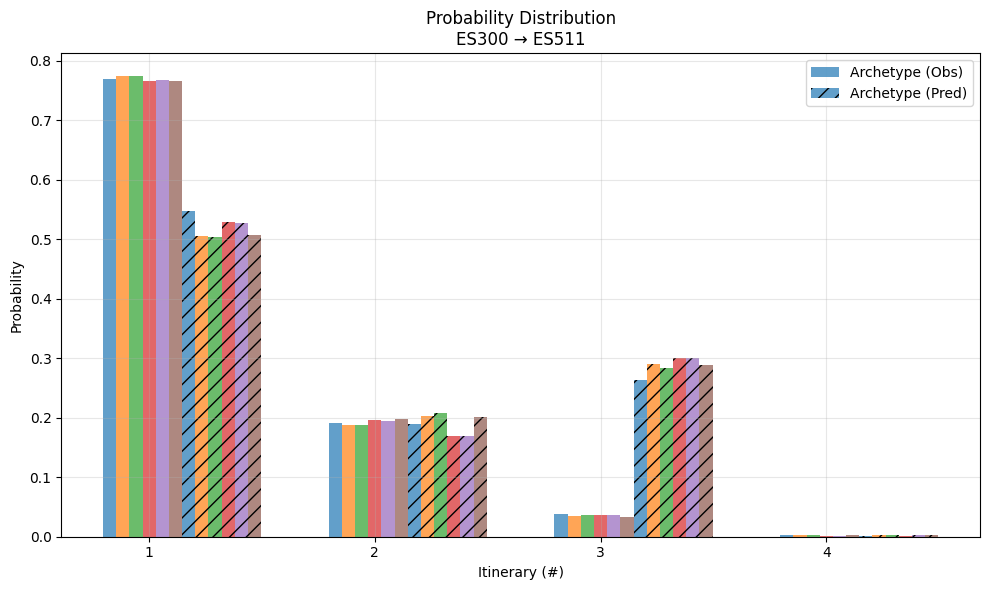

In [66]:
plot_probs("ES300", "ES511", paths_prob_observed, paths_prob)

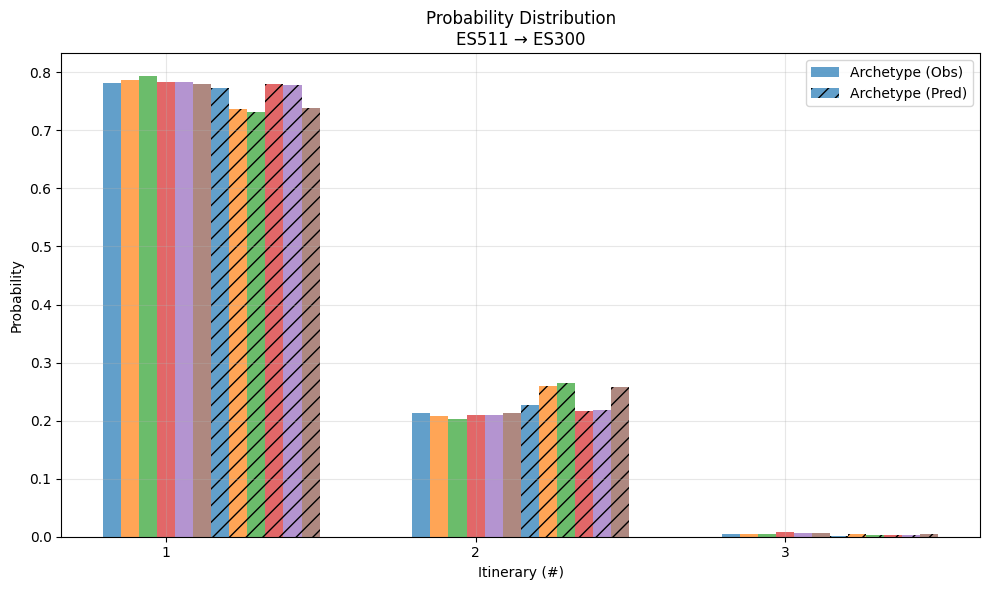

In [67]:
plot_probs("ES511", "ES300", paths_prob_observed, paths_prob)

In [68]:
trips_selected[(trips_selected["origin"]=="ES300")&(trips_selected["destination"]=="ES511")]

,origin,destination,path,trips,archetype_0,archetype_1,archetype_2,archetype_3,archetype_4,archetype_5,nmodes,access_time,egress_time,travel_time_0,cost_0,emissions_0,mct_time_0_1,travel_time_1,cost_1,emissions_1,mct_time_1_2,travel_time_2,cost_2,emissions_2,total_travel_time,total_cost,total_emissions,noption,trips_per_od_pair,trips_per_od_pair_arch_0,prob_per_od_pair_arch_0,trips_per_od_pair_arch_1,prob_per_od_pair_arch_1,trips_per_od_pair_arch_2,prob_per_od_pair_arch_2,trips_per_od_pair_arch_3,prob_per_od_pair_arch_3,trips_per_od_pair_arch_4,prob_per_od_pair_arch_4,trips_per_od_pair_arch_5,prob_per_od_pair_arch_5
0,ES300,ES511,"['007160000', '007171801']",6361.680,4325.017695,280.996369,409.739139,410.587811,420.376248,499.745738,1.0,23.0,36.0,165.172414,52.96,14.560000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,224.172414,52.96,14.560000,1,8274.186,5624.733967,0.768928,362.881315,0.774348,529.131436,0.774362,535.946399,0.766099,547.768131,0.767435,651.864752,0.766640
1,ES300,ES511,"['LEMD', 'LEBL']",1586.100,1074.899004,68.168852,99.262846,105.183455,106.875102,128.666741,1.0,123.0,63.0,77.619048,136.23,43.547619,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,263.619048,136.23,43.547619,2,8274.186,5624.733967,0.191102,362.881315,0.187854,529.131436,0.187596,535.946399,0.196257,547.768131,0.195110,651.864752,0.197383
2,ES300,ES511,"['007160000', '007104040', '007171801']",309.198,212.926065,12.886202,18.909747,19.295129,19.552718,22.029139,1.0,23.0,36.0,81.666667,25.15,7.880000,15.0,109.333333,23.71,7.43,NaN,NaN,NaN,NaN,265.000000,48.86,15.310000,3,8274.186,5624.733967,0.037855,362.881315,0.035511,529.131436,0.035737,535.946399,0.036002,547.768131,0.035695,651.864752,0.033794
3,ES300,ES511,"['007117000', '007171801']",17.208,11.891204,0.829892,1.219704,0.880004,0.964062,1.423134,1.0,32.0,36.0,562.000000,52.71,14.490000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,630.000000,52.71,14.490000,4,8274.186,5624.733967,0.002114,362.881315,0.002287,529.131436,0.002305,535.946399,0.001642,547.768131,0.001760,651.864752,0.002183


In [ ]:
trips_selected[(trips_selected["origin"]=="ES511")&(trips_selected["destination"]=="ES300")]

,origin,destination,path,trips,archetype_0,archetype_1,archetype_2,archetype_3,archetype_4,archetype_5,nmodes,access_time,egress_time,travel_time_0,cost_0,emissions_0,mct_time_0_1,travel_time_1,cost_1,emissions_1,mct_time_1_2,travel_time_2,cost_2,emissions_2,total_travel_time,total_cost,total_emissions,noption,trips_per_od_pair,trips_per_od_pair_arch_0,prob_per_od_pair_arch_0,trips_per_od_pair_arch_1,prob_per_od_pair_arch_1,trips_per_od_pair_arch_2,prob_per_od_pair_arch_2,trips_per_od_pair_arch_3,prob_per_od_pair_arch_3,trips_per_od_pair_arch_4,prob_per_od_pair_arch_4,trips_per_od_pair_arch_5,prob_per_od_pair_arch_5
4,ES511,ES300,"['007171801', '007160000']",7098.778,4815.351893,318.515538,453.898785,493.409581,415.609147,582.541057,1.0,41.0,18.0,163.464286,52.96,14.56000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,222.464286,52.96,14.56000,1,9066.654,6160.964201,0.781591,404.917038,0.786619,572.072183,0.793429,629.936123,0.783269,529.978837,0.784200,746.494618,0.780369
5,ES511,ES300,"['LEBL', 'LEMD']",1921.272,1315.669159,84.506455,115.946944,131.916042,110.851689,159.542711,1.0,123.0,63.0,85.625000,136.23,43.55375,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,271.625000,136.23,43.55375,2,9066.654,6160.964201,0.213549,404.917038,0.208701,572.072183,0.202679,629.936123,0.209412,529.978837,0.209162,746.494618,0.213723
6,ES511,ES300,"['007171801', '007117000']",46.604,29.943150,1.895045,2.226455,4.610499,3.518001,4.410850,1.0,41.0,28.0,546.000000,52.71,14.49000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,615.000000,52.71,14.49000,3,9066.654,6160.964201,0.004860,404.917038,0.004680,572.072183,0.003892,629.936123,0.007319,529.978837,0.006638,746.494618,0.005909


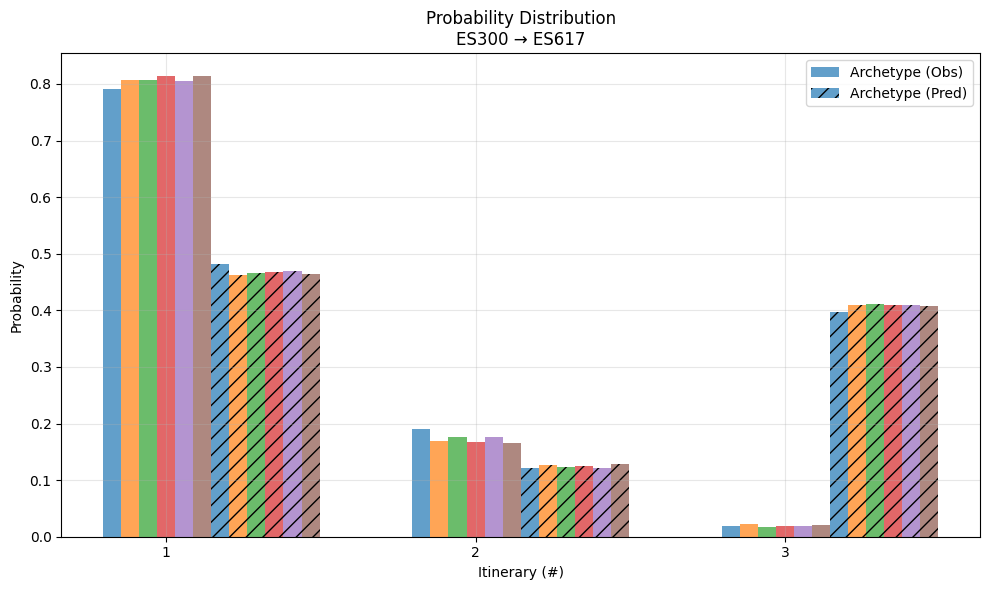

In [71]:
plot_probs("ES300", "ES617", paths_prob_observed, paths_prob)

In [72]:
trips_selected[(trips_selected["origin"]=="ES300")&(trips_selected["destination"]=="ES617")]

,origin,destination,path,trips,archetype_0,archetype_1,archetype_2,archetype_3,archetype_4,archetype_5,nmodes,access_time,egress_time,travel_time_0,cost_0,emissions_0,mct_time_0_1,travel_time_1,cost_1,emissions_1,mct_time_1_2,travel_time_2,cost_2,emissions_2,total_travel_time,total_cost,total_emissions,noption,trips_per_od_pair,trips_per_od_pair_arch_0,prob_per_od_pair_arch_0,trips_per_od_pair_arch_1,prob_per_od_pair_arch_1,trips_per_od_pair_arch_2,prob_per_od_pair_arch_2,trips_per_od_pair_arch_3,prob_per_od_pair_arch_3,trips_per_od_pair_arch_4,prob_per_od_pair_arch_4,trips_per_od_pair_arch_5,prob_per_od_pair_arch_5
7,ES300,ES617,"['007160000', '007154413']",2657.540,1933.211741,70.562478,91.391807,270.183098,134.657350,151.342526,1.0,23.0,31.0,186.083333,43.88,12.060000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,240.083333,43.88,12.060000,1,3334.827,2442.73941,0.791411,87.394983,0.807397,113.275189,0.806812,332.02712,0.813738,167.190093,0.805415,186.009205,0.813629
8,ES300,ES617,"['LEMD', 'LEMG']",614.067,463.927312,14.844251,19.863314,55.381085,29.388301,30.662737,1.0,123.0,50.0,76.666667,131.11,60.033333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,249.666667,131.11,60.033333,2,3334.827,2442.73941,0.189921,87.394983,0.169852,113.275189,0.175355,332.02712,0.166797,167.190093,0.175778,186.009205,0.164845
9,ES300,ES617,"['007160000', '007102003']",63.220,45.600357,1.988254,2.020067,6.462937,3.144442,4.003942,1.0,23.0,72.0,158.384615,40.27,11.070000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,253.384615,40.27,11.070000,3,3334.827,2442.73941,0.018668,87.394983,0.022750,113.275189,0.017833,332.02712,0.019465,167.190093,0.018808,186.009205,0.021526


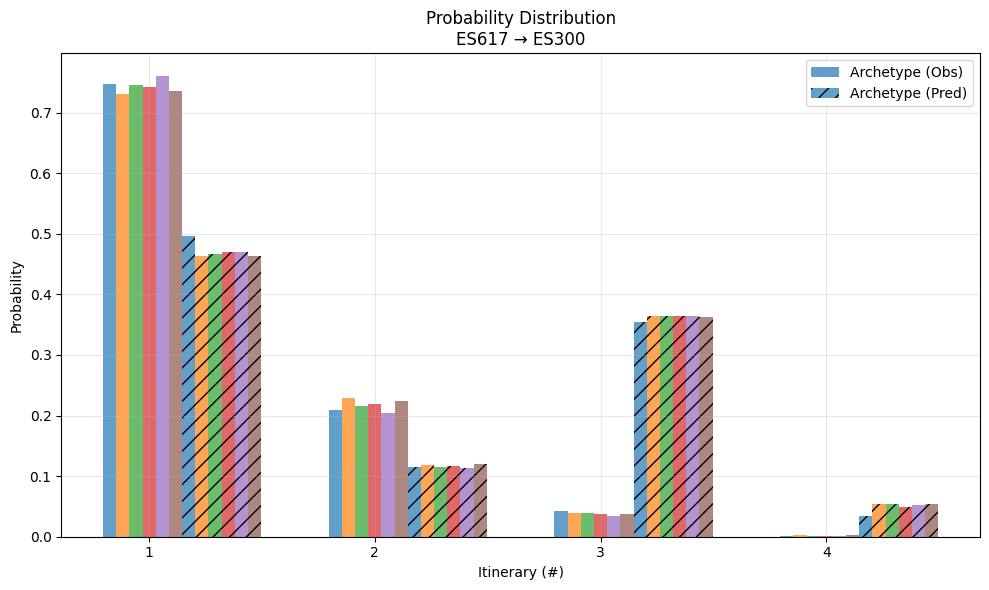

In [73]:
plot_probs("ES617", "ES300", paths_prob_observed, paths_prob)

In [74]:
trips_selected[(trips_selected["origin"]=="ES617")&(trips_selected["destination"]=="ES300")]

,origin,destination,path,trips,archetype_0,archetype_1,archetype_2,archetype_3,archetype_4,archetype_5,nmodes,access_time,egress_time,travel_time_0,cost_0,emissions_0,mct_time_0_1,travel_time_1,cost_1,emissions_1,mct_time_1_2,travel_time_2,cost_2,emissions_2,total_travel_time,total_cost,total_emissions,noption,trips_per_od_pair,trips_per_od_pair_arch_0,prob_per_od_pair_arch_0,trips_per_od_pair_arch_1,prob_per_od_pair_arch_1,trips_per_od_pair_arch_2,prob_per_od_pair_arch_2,trips_per_od_pair_arch_3,prob_per_od_pair_arch_3,trips_per_od_pair_arch_4,prob_per_od_pair_arch_4,trips_per_od_pair_arch_5,prob_per_od_pair_arch_5
10,ES617,ES300,"['007154413', '007160000']",1805.471,1175.106823,47.114557,56.347313,171.742450,251.615605,99.898252,1.0,36.0,18.0,187.000000,43.88,12.060000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,241.000000,43.88,12.060000,1,2415.104,1573.182406,0.746962,64.531444,0.730102,75.661065,0.744733,231.317525,0.742453,331.06562,0.760017,135.69994,0.736170
11,ES617,ES300,"['LEMG', 'LEMD']",508.780,328.857738,14.797151,16.278233,50.499747,67.853788,30.493343,1.0,110.0,63.0,82.500000,131.11,60.033333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,255.500000,131.11,60.033333,2,2415.104,1573.182406,0.209040,64.531444,0.229301,75.661065,0.215147,231.317525,0.218314,331.06562,0.204956,135.69994,0.224712
12,ES617,ES300,"['007102003', '007160000']",98.111,67.626808,2.484328,2.954274,8.621713,11.399887,5.023990,1.0,78.0,18.0,167.090909,40.27,11.070000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,263.090909,40.27,11.070000,3,2415.104,1573.182406,0.042987,64.531444,0.038498,75.661065,0.039046,231.317525,0.037272,331.06562,0.034434,135.69994,0.037023
13,ES617,ES300,"['007155007', '007160000']",2.742,1.591037,0.135407,0.081244,0.453615,0.196341,0.284356,1.0,107.0,18.0,275.000000,45.00,12.370000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,400.000000,45.00,12.370000,4,2415.104,1573.182406,0.001011,64.531444,0.002098,75.661065,0.001074,231.317525,0.001961,331.06562,0.000593,135.69994,0.002095


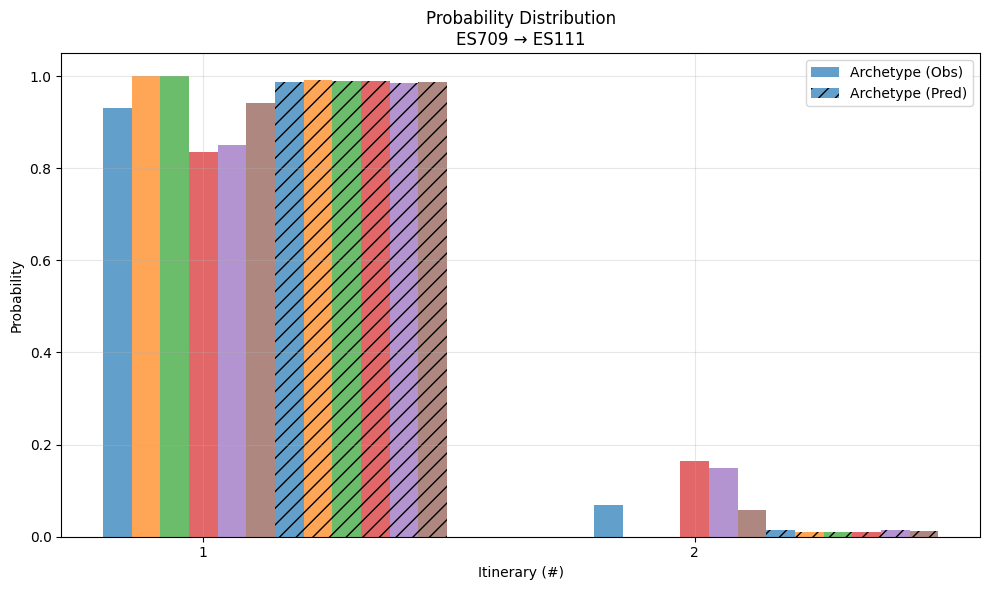

In [76]:
plot_probs("ES709", "ES111", paths_prob_observed, paths_prob)

In [78]:
trips_selected[(trips_selected["origin"]=="ES709")&(trips_selected["destination"]=="ES111")]

,origin,destination,path,trips,archetype_0,archetype_1,archetype_2,archetype_3,archetype_4,archetype_5,nmodes,access_time,egress_time,travel_time_0,cost_0,emissions_0,mct_time_0_1,travel_time_1,cost_1,emissions_1,mct_time_1_2,travel_time_2,cost_2,emissions_2,total_travel_time,total_cost,total_emissions,noption,trips_per_od_pair,trips_per_od_pair_arch_0,prob_per_od_pair_arch_0,trips_per_od_pair_arch_1,prob_per_od_pair_arch_1,trips_per_od_pair_arch_2,prob_per_od_pair_arch_2,trips_per_od_pair_arch_3,prob_per_od_pair_arch_3,trips_per_od_pair_arch_4,prob_per_od_pair_arch_4,trips_per_od_pair_arch_5,prob_per_od_pair_arch_5
14,ES709,ES111,"['GCTS', 'LEST']",102.052,41.751341,5.191449,2.882673,36.913477,9.780330,5.532731,1.0,164.0,80.0,160.0,216.18,106.97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,404.0,216.18,106.97,1,114.473,44.856591,0.930774,5.191449,1.0,2.882673,1.0,44.15906,0.835921,11.505469,0.850059,5.877758,0.941299
15,ES709,ES111,"['GCTS', 'LEMD', 'LEST']",12.421,3.105250,0.000000,0.000000,7.245583,1.725139,0.345028,1.0,164.0,80.0,165.0,216.89,113.23,79.0,70.0,136.23,43.01,NaN,NaN,NaN,NaN,558.0,353.12,156.24,2,114.473,44.856591,0.069226,5.191449,0.0,2.882673,0.0,44.15906,0.164079,11.505469,0.149941,5.877758,0.058701


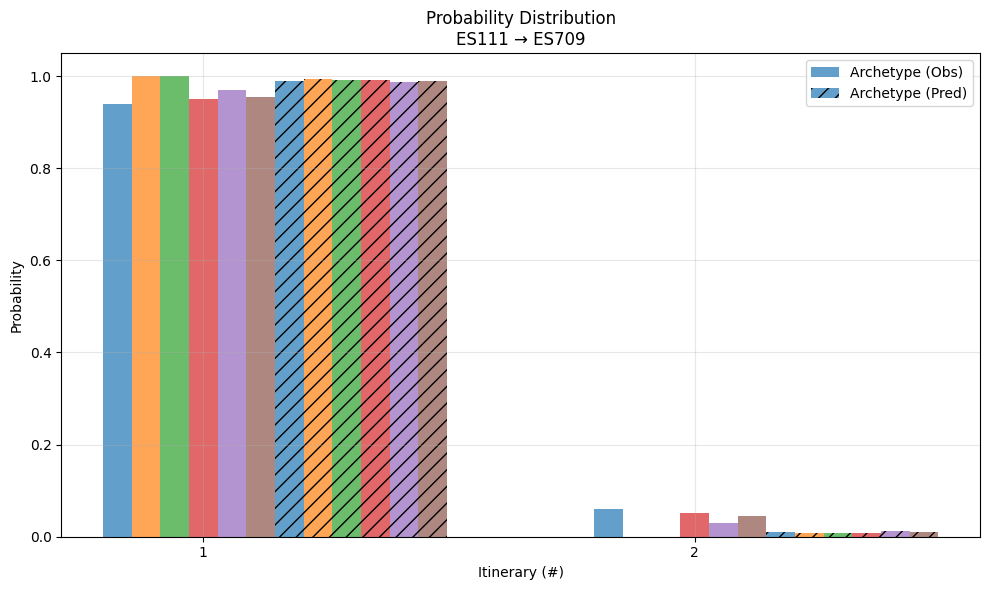

In [79]:
plot_probs("ES111", "ES709", paths_prob_observed, paths_prob)

In [80]:
trips_selected[(trips_selected["origin"]=="ES111")&(trips_selected["destination"]=="ES709")]

,origin,destination,path,trips,archetype_0,archetype_1,archetype_2,archetype_3,archetype_4,archetype_5,nmodes,access_time,egress_time,travel_time_0,cost_0,emissions_0,mct_time_0_1,travel_time_1,cost_1,emissions_1,mct_time_1_2,travel_time_2,cost_2,emissions_2,total_travel_time,total_cost,total_emissions,noption,trips_per_od_pair,trips_per_od_pair_arch_0,prob_per_od_pair_arch_0,trips_per_od_pair_arch_1,prob_per_od_pair_arch_1,trips_per_od_pair_arch_2,prob_per_od_pair_arch_2,trips_per_od_pair_arch_3,prob_per_od_pair_arch_3,trips_per_od_pair_arch_4,prob_per_od_pair_arch_4,trips_per_od_pair_arch_5,prob_per_od_pair_arch_5
16,ES111,ES709,"['LEST', 'GCTS']",121.695,50.04782,5.758186,1.680991,52.738632,6.920707,4.548665,1.0,143.0,104.0,170.0,216.18,106.970,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,417.0,216.18,106.970,1,128.175,53.28782,0.939198,5.758186,1.0,1.680991,1.0,55.546632,0.949448,7.136707,0.969734,4.764665,0.954666
17,ES111,ES709,"['LECO', 'LEMD', 'GCTS']",6.480,3.24000,0.000000,0.000000,2.808000,0.216000,0.216000,1.0,115.0,104.0,80.0,138.57,53.705,79.0,180.0,216.89,113.23,NaN,NaN,NaN,NaN,558.0,355.46,166.935,2,128.175,53.28782,0.060802,5.758186,0.0,1.680991,0.0,55.546632,0.050552,7.136707,0.030266,4.764665,0.045334


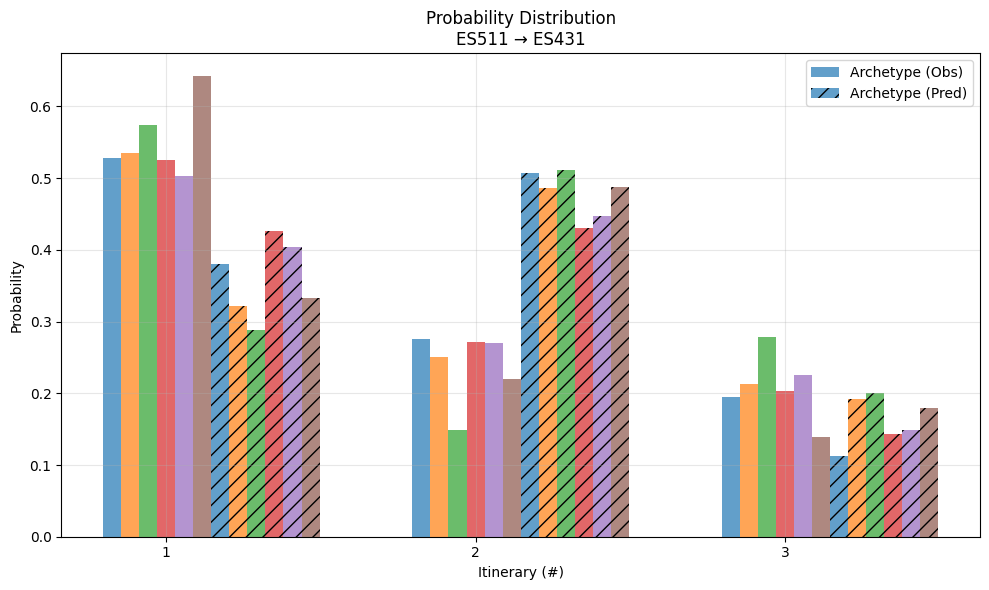

In [84]:
plot_probs("ES511", "ES431", paths_prob_observed, paths_prob)

In [85]:
trips_selected[(trips_selected["origin"]=="ES511")&(trips_selected["destination"]=="ES431")]

,origin,destination,path,trips,archetype_0,archetype_1,archetype_2,archetype_3,archetype_4,archetype_5,nmodes,access_time,egress_time,travel_time_0,cost_0,emissions_0,mct_time_0_1,travel_time_1,cost_1,emissions_1,mct_time_1_2,travel_time_2,cost_2,emissions_2,total_travel_time,total_cost,total_emissions,noption,trips_per_od_pair,trips_per_od_pair_arch_0,prob_per_od_pair_arch_0,trips_per_od_pair_arch_1,prob_per_od_pair_arch_1,trips_per_od_pair_arch_2,prob_per_od_pair_arch_2,trips_per_od_pair_arch_3,prob_per_od_pair_arch_3,trips_per_od_pair_arch_4,prob_per_od_pair_arch_4,trips_per_od_pair_arch_5,prob_per_od_pair_arch_5
18,ES511,ES431,"['LEBL', 'LEBZ']",69.286,40.862252,1.089082,1.690829,15.744660,6.608775,3.290402,1.0,123.0,100.0,100.000,162.70,94.52000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,323.000,162.70,94.52000,1,130.542,77.318693,0.528491,2.03464,0.535270,2.948442,0.573465,29.987164,0.525047,13.129389,0.503357,5.123672,0.642196
19,ES511,ES431,"['LEBL', 'LEZL']",35.127,21.339323,0.511178,0.437144,8.160256,3.555474,1.123624,1.0,123.0,175.0,103.125,163.13,58.07250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,401.125,163.13,58.07250,2,130.542,77.318693,0.275992,2.03464,0.251238,2.948442,0.148263,29.987164,0.272125,13.129389,0.270803,5.123672,0.219301
20,ES511,ES431,"['LEBL', 'LEMD']",26.129,15.117117,0.434380,0.820469,6.082247,2.965140,0.709646,1.0,123.0,315.0,85.625,136.23,43.55375,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,523.625,136.23,43.55375,3,130.542,77.318693,0.195517,2.03464,0.213492,2.948442,0.278272,29.987164,0.202828,13.129389,0.225840,5.123672,0.138503


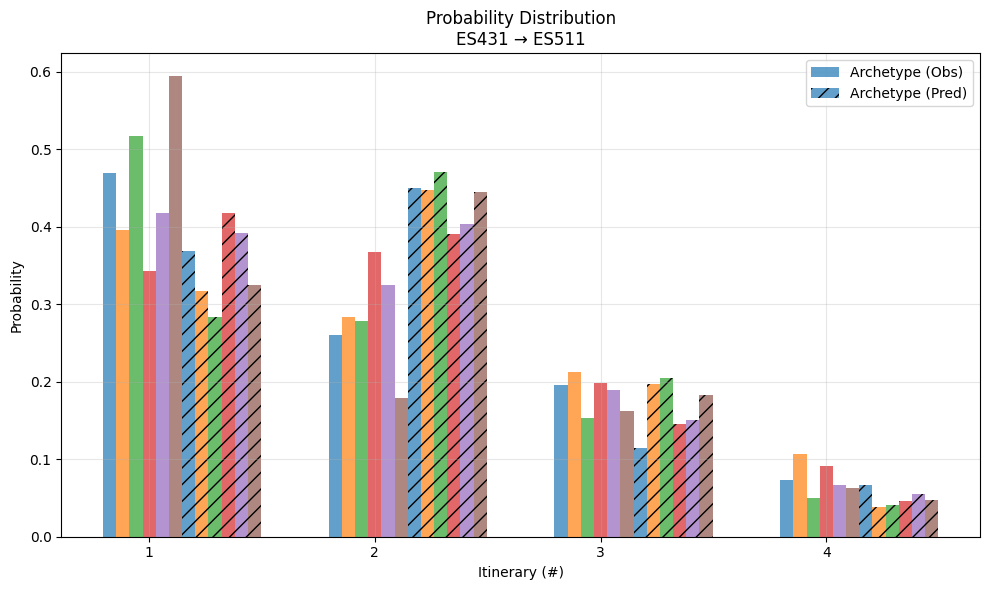

In [86]:
plot_probs("ES431", "ES511", paths_prob_observed, paths_prob)

In [87]:
trips_selected[(trips_selected["origin"]=="ES431")&(trips_selected["destination"]=="ES511")]

,origin,destination,path,trips,archetype_0,archetype_1,archetype_2,archetype_3,archetype_4,archetype_5,nmodes,access_time,egress_time,travel_time_0,cost_0,emissions_0,mct_time_0_1,travel_time_1,cost_1,emissions_1,mct_time_1_2,travel_time_2,cost_2,emissions_2,total_travel_time,total_cost,total_emissions,noption,trips_per_od_pair,trips_per_od_pair_arch_0,prob_per_od_pair_arch_0,trips_per_od_pair_arch_1,prob_per_od_pair_arch_1,trips_per_od_pair_arch_2,prob_per_od_pair_arch_2,trips_per_od_pair_arch_3,prob_per_od_pair_arch_3,trips_per_od_pair_arch_4,prob_per_od_pair_arch_4,trips_per_od_pair_arch_5,prob_per_od_pair_arch_5
21,ES431,ES511,"['LEBZ', 'LEBL']",58.386,27.326488,0.503009,0.846410,6.515026,21.021984,2.173084,1.0,160.0,63.0,95.000000,162.70,94.520000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,318.000000,162.70,94.520000,1,133.967,58.173643,0.469740,1.26875,0.396460,1.635313,0.517583,18.961074,0.343600,50.272789,0.418158,3.65543,0.594481
22,ES431,ES511,"['LEZL', 'LEBL']",39.975,15.177721,0.359153,0.455830,6.962676,16.363749,0.655871,1.0,239.0,63.0,99.375000,163.13,58.072500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,401.375000,163.13,58.072500,2,133.967,58.173643,0.260904,1.26875,0.283076,1.635313,0.278742,18.961074,0.367209,50.272789,0.325499,3.65543,0.179424
23,ES431,ES511,"['LEMD', 'LEBL']",25.791,11.385963,0.270477,0.251541,3.759797,9.528203,0.595019,1.0,375.0,63.0,77.619048,136.23,43.547619,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,515.619048,136.23,43.547619,3,133.967,58.173643,0.195724,1.26875,0.213184,1.635313,0.153818,18.961074,0.198290,50.272789,0.189530,3.65543,0.162777
24,ES431,ES511,"['LEBZ', 'LEMD', 'LEBL']",9.815,4.283471,0.136111,0.081532,1.723575,3.358853,0.231457,1.0,160.0,63.0,60.000000,119.45,58.200000,47.0,76.666667,136.23,48.573333,NaN,NaN,NaN,NaN,406.666667,255.68,106.773333,4,133.967,58.173643,0.073633,1.26875,0.107280,1.635313,0.049857,18.961074,0.090901,50.272789,0.066813,3.65543,0.063319


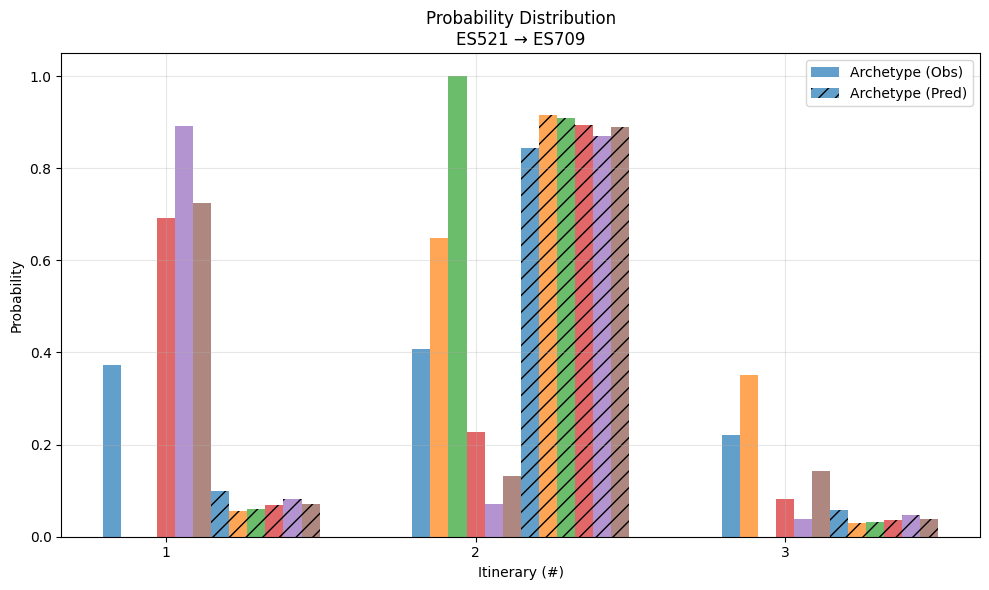

In [89]:
plot_probs("ES521", "ES709", paths_prob_observed, paths_prob)